Q1 
Use Random Forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Setps to follow
Importing the dataset and perfroming basic EDA
feature engineering
Random forest classifier
Visualization of tree estimators
trying with different hyperparameters

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn import tree

In [2]:
data = pd.read_csv('Fraud_check.csv')
data.rename(columns={'Undergrad':'undergrad','Marital.Status':'marital_status','Taxable.Income':'tax_income','City.Population':'city_pop','Work.Experience':'work_exp','Urban':'urban'}, inplace=True)
df = data.copy()
df

undergrad marital_status  tax_income  city_pop  work_exp urban
0          NO         Single       68833     50047        10   YES
1         YES       Divorced       33700    134075        18   YES
2          NO        Married       36925    160205        30   YES
3         YES         Single       50190    193264        15   YES
4          NO        Married       81002     27533        28    NO
..        ...            ...         ...       ...       ...   ...
595       YES       Divorced       76340     39492         7   YES
596       YES       Divorced       69967     55369         2   YES
597        NO       Divorced       47334    154058         0   YES
598       YES        Married       98592    180083        17    NO
599        NO       Divorced       96519    158137        16    NO

[600 rows x 6 columns]

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   undergrad       600 non-null    object
 1   marital_status  600 non-null    object
 2   tax_income      600 non-null    int64 
 3   city_pop        600 non-null    int64 
 4   work_exp        600 non-null    int64 
 5   urban           600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


tax_income       city_pop    work_exp
count    600.000000     600.000000  600.000000
mean   55208.375000  108747.368333   15.558333
std    26204.827597   49850.075134    8.842147
min    10003.000000   25779.000000    0.000000
25%    32871.500000   66966.750000    8.000000
50%    55074.500000  106493.500000   15.000000
75%    78611.750000  150114.250000   24.000000
max    99619.000000  199778.000000   30.000000

In [4]:
#defining function to assign risky and good values

def filt(x):
    if x<=30000:
        return 'Risky'
    else:
        return 'Good'

In [5]:
df['fraud'] = df['tax_income'].copy()
df['fraud'] = df['fraud'].apply(filt)
df

undergrad marital_status  tax_income  city_pop  work_exp urban fraud
0          NO         Single       68833     50047        10   YES  Good
1         YES       Divorced       33700    134075        18   YES  Good
2          NO        Married       36925    160205        30   YES  Good
3         YES         Single       50190    193264        15   YES  Good
4          NO        Married       81002     27533        28    NO  Good
..        ...            ...         ...       ...       ...   ...   ...
595       YES       Divorced       76340     39492         7   YES  Good
596       YES       Divorced       69967     55369         2   YES  Good
597        NO       Divorced       47334    154058         0   YES  Good
598       YES        Married       98592    180083        17    NO  Good
599        NO       Divorced       96519    158137        16    NO  Good

[600 rows x 7 columns]

In [6]:
df.fraud.value_counts()

Good     476
Risky    124
Name: fraud, dtype: int64

In [7]:
label_encoder = preprocessing.LabelEncoder()
df['undergrad']= label_encoder.fit_transform(df['undergrad']) 
df['urban']= label_encoder.fit_transform(df['urban']) 
df['marital_status']= label_encoder.fit_transform(df['marital_status']) 
df['fraud']= label_encoder.fit_transform(df['fraud'])

df.head()

undergrad  marital_status  tax_income  city_pop  work_exp  urban  fraud
0          0               2       68833     50047        10      1      0
1          1               0       33700    134075        18      1      0
2          0               1       36925    160205        30      1      0
3          1               2       50190    193264        15      1      0
4          0               1       81002     27533        28      0      0

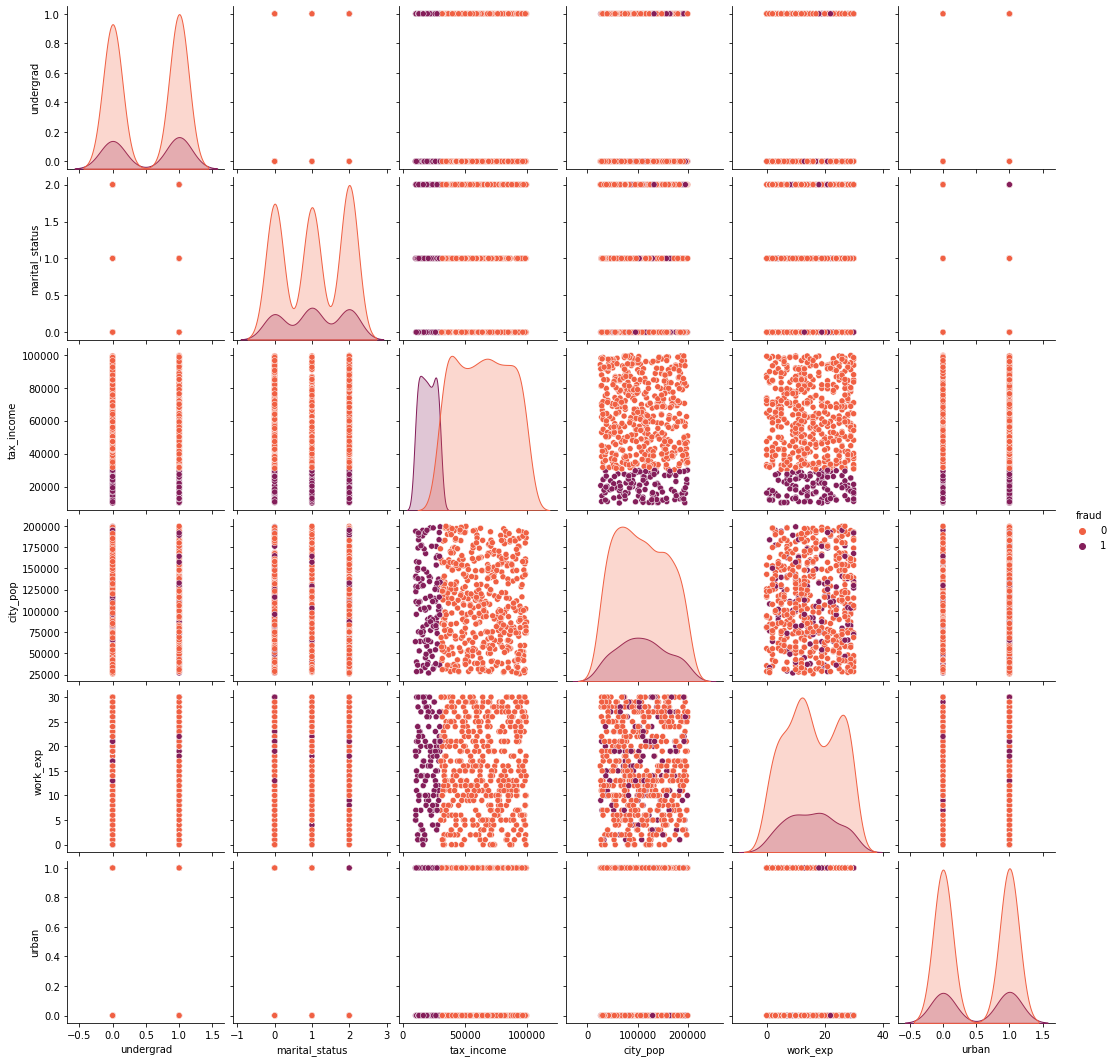

In [8]:
sns.pairplot(df,hue='fraud',palette = 'rocket_r')

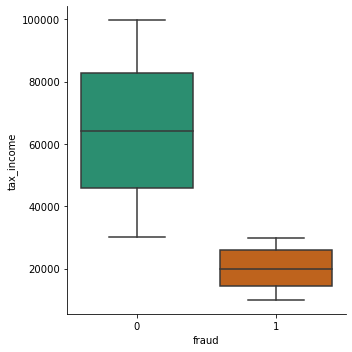

In [9]:
sns.catplot(x='fraud',y='tax_income',data=df,kind='box',palette='Dark2')

In [10]:
#feature engineering
 #train test split
X = df.iloc[:,:-1]
y =df.fraud
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [11]:
# random forest classifier

In [12]:
model =  RandomForestClassifier(n_estimators=10,max_features='auto',random_state=101)
model.fit(X_train,y_train)
pred = model.predict(X_test)

In [13]:
#evaluation

In [14]:
confusion_matrix(y_test,pred)

array([[146,   0],
       [  0,  34]], dtype=int64)

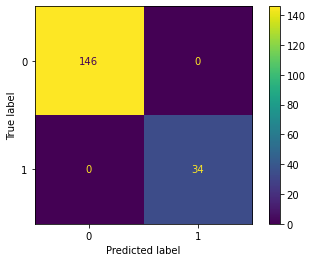

In [15]:
plot_confusion_matrix(model,X_test,y_test)

In [16]:
print(classification_report(y_test,pred))
# good values

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       1.00      1.00      1.00        34

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180



In [17]:
model.feature_importances_

array([0.00268921, 0.00956613, 0.91284814, 0.05071584, 0.01893707,
       0.00524362])

In [18]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance']) 
# tax income matters the most

Feature Importance
undergrad                 0.002689
marital_status            0.009566
tax_income                0.912848
city_pop                  0.050716
work_exp                  0.018937
urban                     0.005244

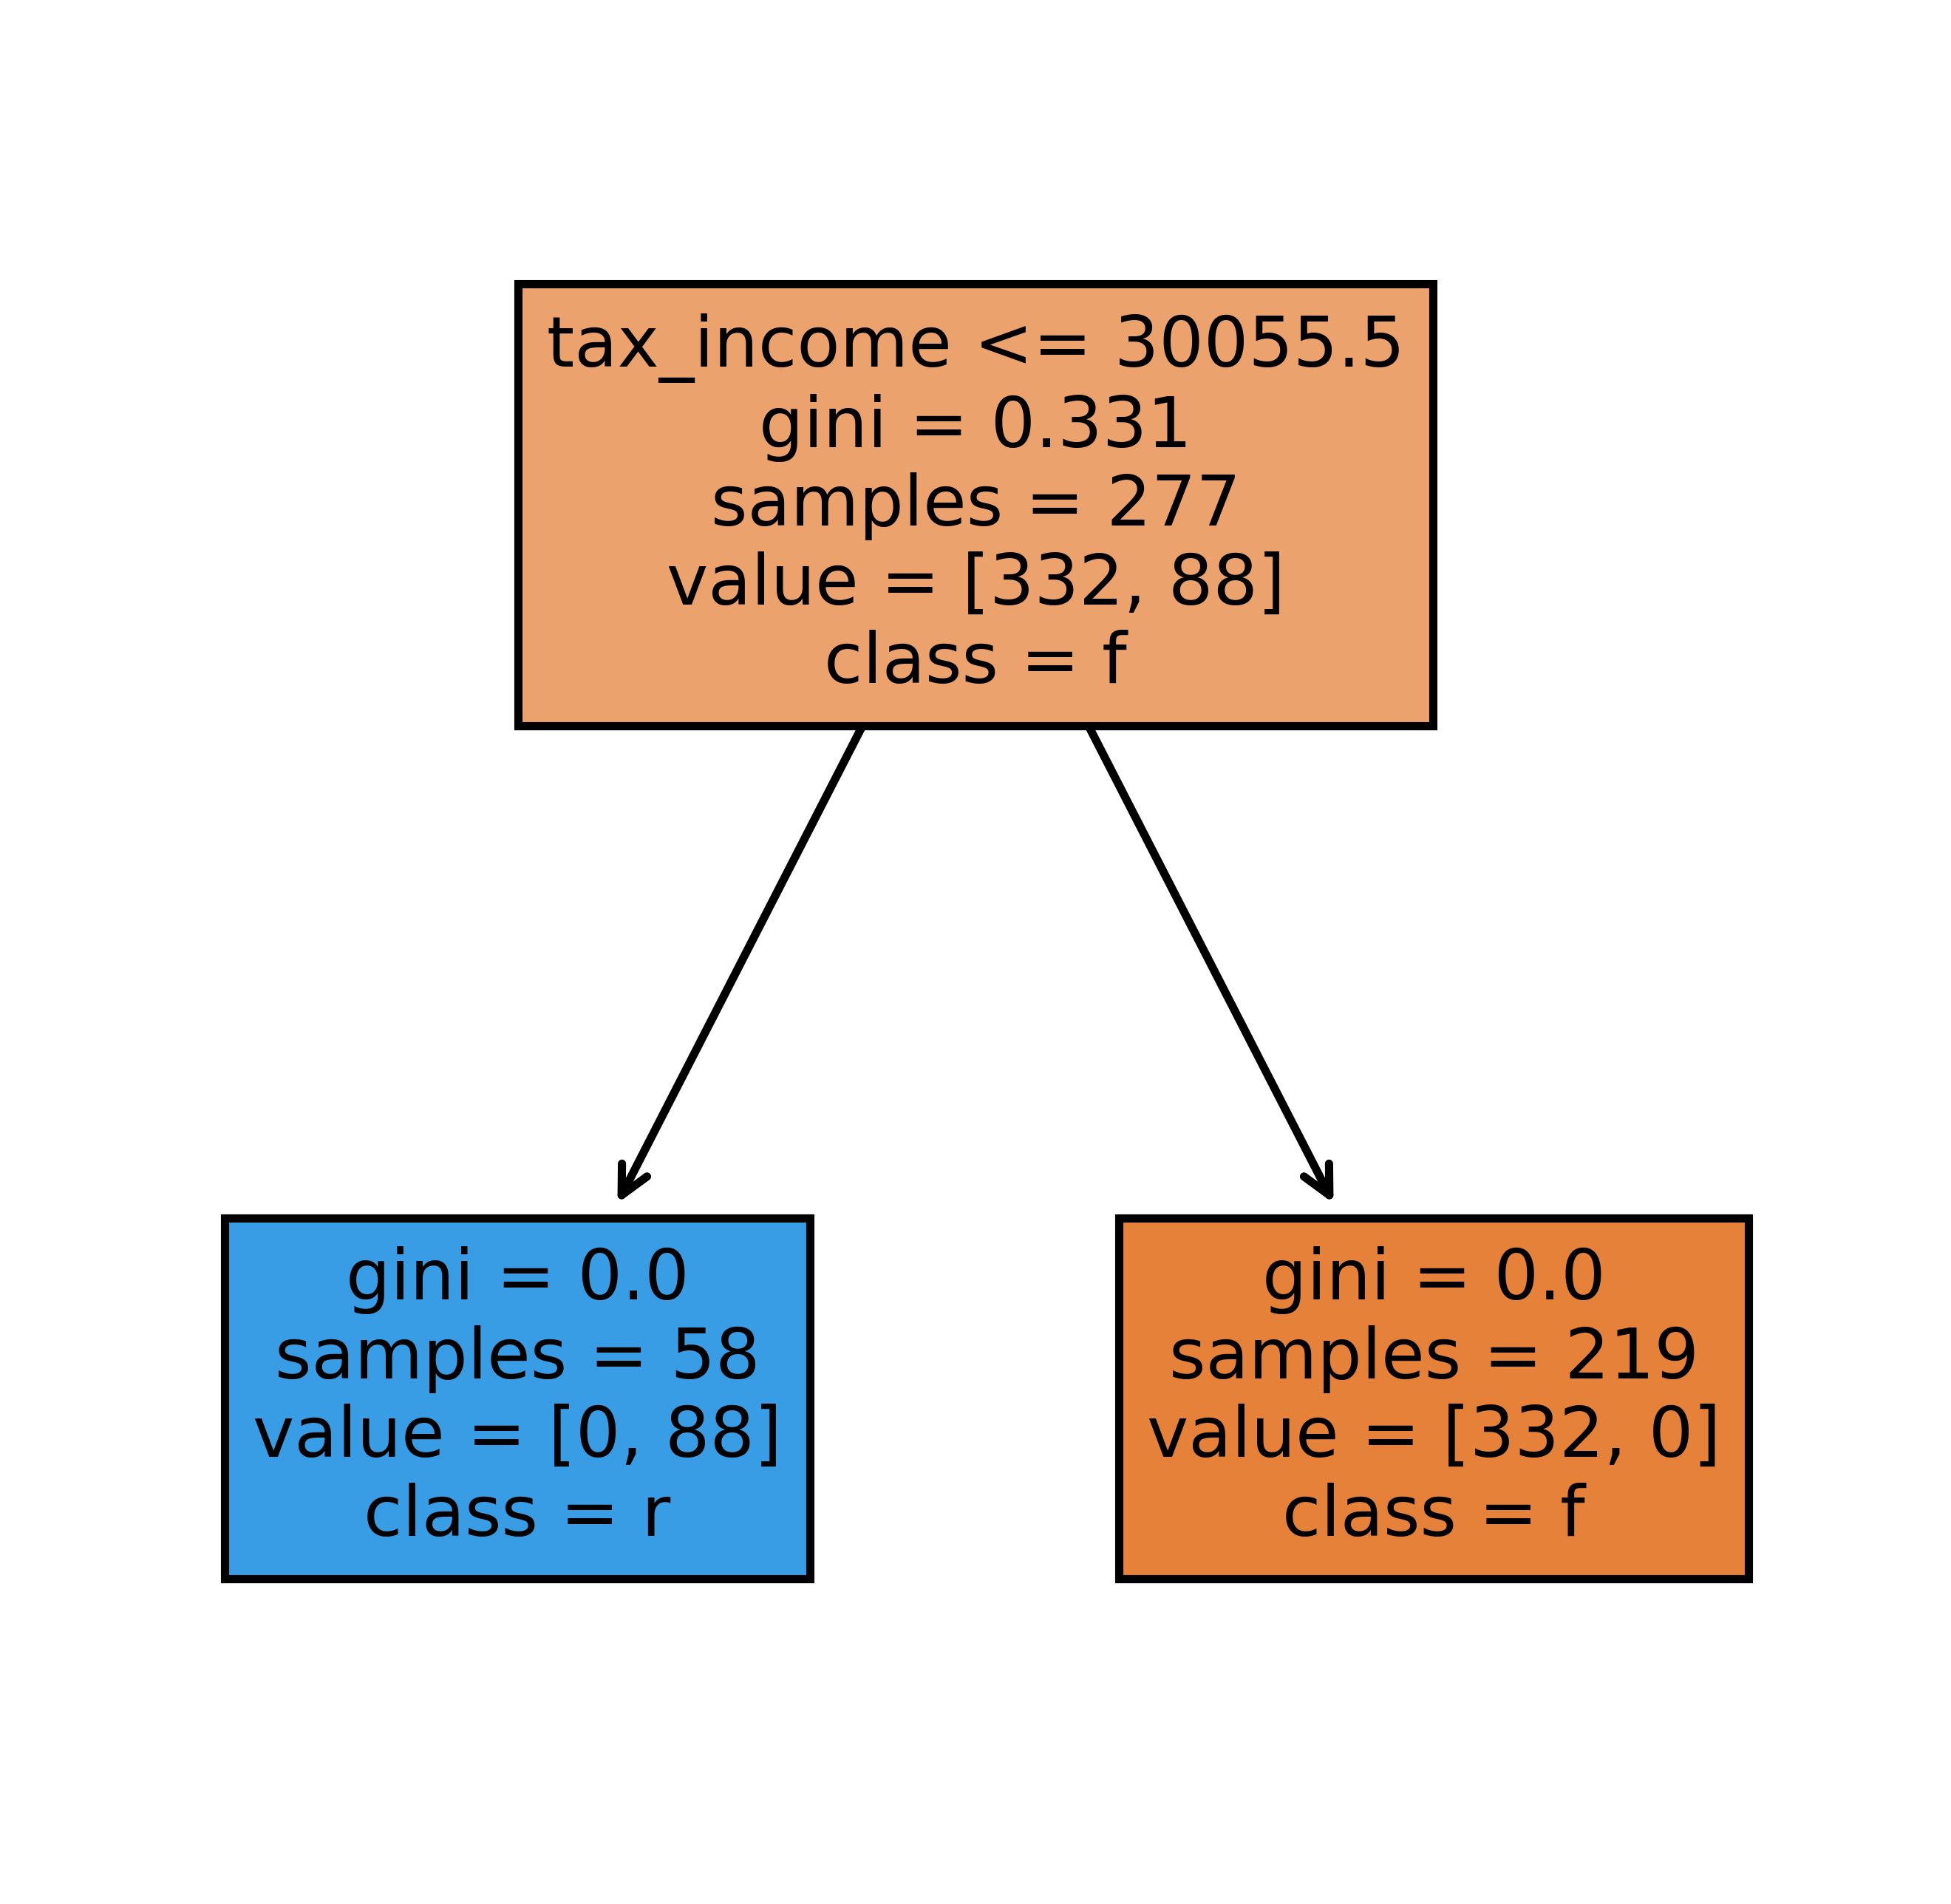

In [19]:
# visualization of tree
 # single tree
fn=df.columns.values[:-1]
cn=df.columns.values[-1]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(model.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);

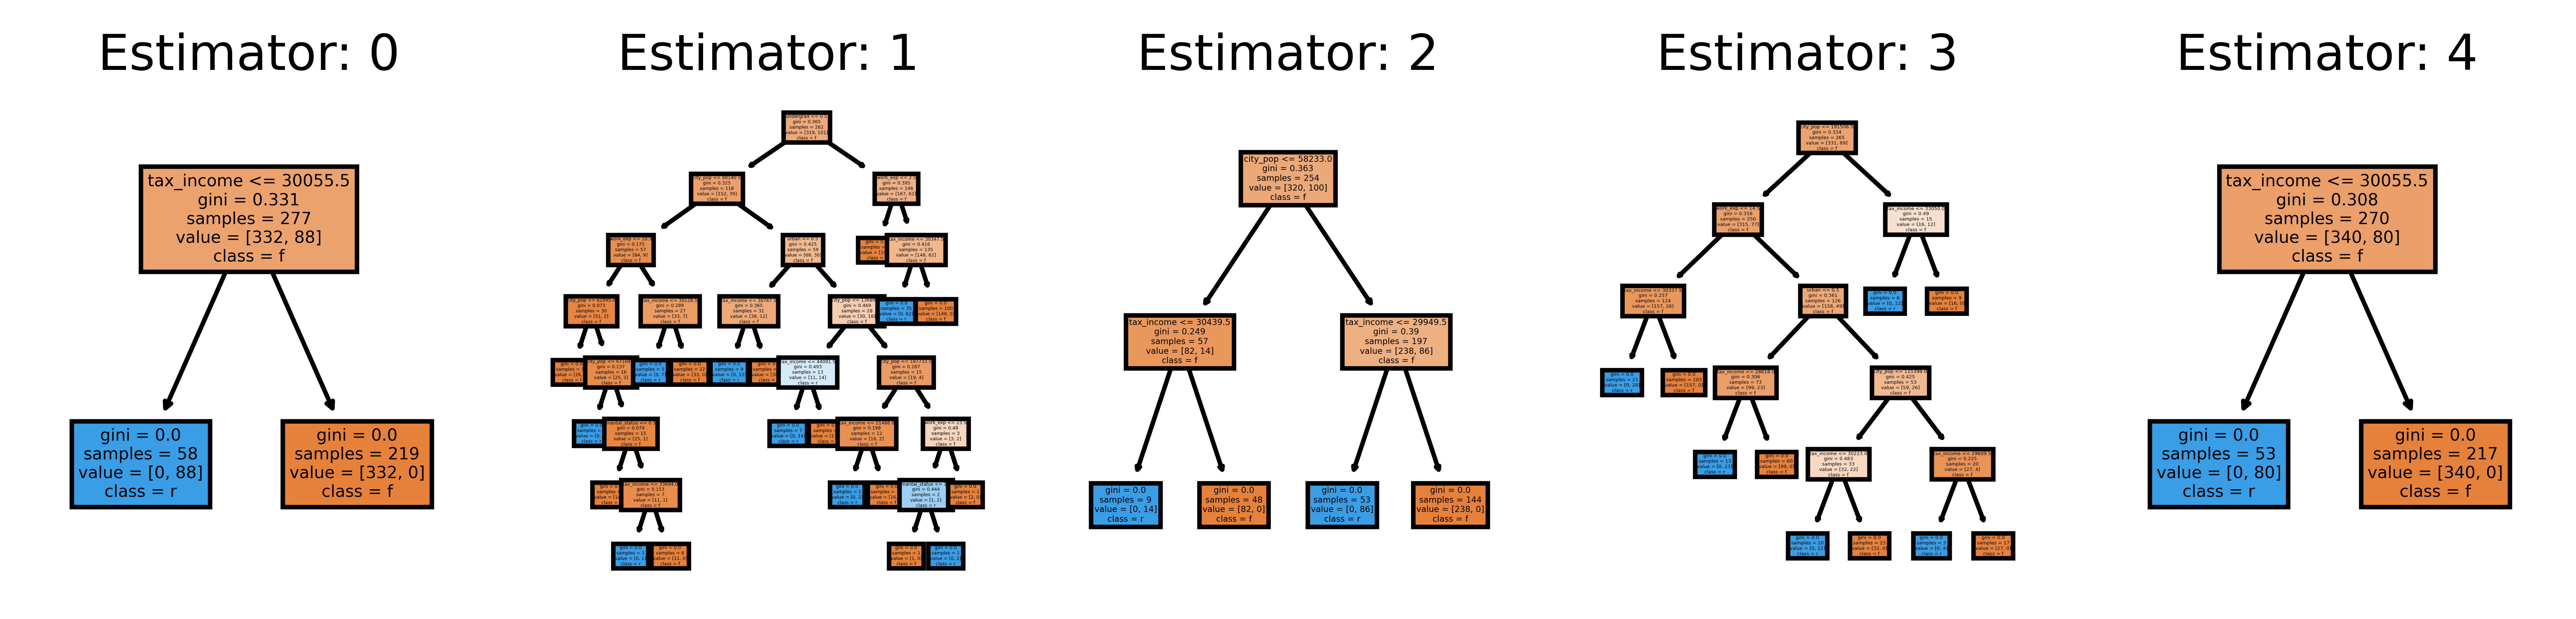

In [20]:
#multiple tree
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900) 
for index in range(0, 5):
    tree.plot_tree(model.estimators_[index],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)

Q2 
Random Forest

Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


About the data:

Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not

In [21]:
data = pd.read_csv('Company_Data.csv')
df = data.copy()
df

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

In [22]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

<AxesSubplot:xlabel='Sales', ylabel='Count'>

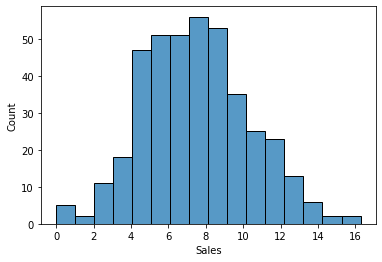

In [23]:
sns.histplot(df.Sales)

In [24]:
#def func to assign low sale and high sale

def filt(x):
    if x<= np.mean(df.Sales):
        return 'Low Sale'
    else: 
        return 'High Sale'

In [25]:
df['sales_cat'] = df['Sales'].copy()
df['sales_cat'] = df['sales_cat'].apply(filt)
df.pop('Sales')
df

CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0          138      73           11         276    120       Bad   42   
1          111      48           16         260     83      Good   65   
2          113      35           10         269     80    Medium   59   
3          117     100            4         466     97    Medium   55   
4          141      64            3         340    128       Bad   38   
..         ...     ...          ...         ...    ...       ...  ...   
395        138     108           17         203    128      Good   33   
396        139      23            3          37    120    Medium   55   
397        162      26           12         368    159    Medium   40   
398        100      79            7         284     95       Bad   50   
399        134      37            0          27    120      Good   49   

     Education Urban   US  sales_cat  
0           17   Yes  Yes  High Sale  
1           10   Yes  Yes  High Sale  
2           12   Yes  Yes  High Sale  
3           14   Yes  Yes   Low Sale  
4           13   Yes   No   Low Sale  
..         ...   ...  ...        ...  
395         14   Yes  Yes  High Sale  
396         11    No  Yes   Low Sale  
397         18   Yes  Yes   Low Sale  
398         12   Yes  Yes   Low Sale  
399         16   Yes  Yes  High Sale  

[400 rows x 11 columns]

In [26]:
df.sales_cat.value_counts()

Low Sale     201
High Sale    199
Name: sales_cat, dtype: int64

In [27]:
label_encoder = preprocessing.LabelEncoder()
df['ShelveLoc']= label_encoder.fit_transform(df['ShelveLoc']) 
df['Urban']= label_encoder.fit_transform(df['Urban']) 
df['US']= label_encoder.fit_transform(df['US']) 
df['sales_cat']= label_encoder.fit_transform(df['sales_cat'])

df

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0          138      73           11         276    120          0   42   
1          111      48           16         260     83          1   65   
2          113      35           10         269     80          2   59   
3          117     100            4         466     97          2   55   
4          141      64            3         340    128          0   38   
..         ...     ...          ...         ...    ...        ...  ...   
395        138     108           17         203    128          1   33   
396        139      23            3          37    120          2   55   
397        162      26           12         368    159          2   40   
398        100      79            7         284     95          0   50   
399        134      37            0          27    120          1   49   

     Education  Urban  US  sales_cat  
0           17      1   1          0  
1           10      1   1          0  
2           12      1   1          0  
3           14      1   1          1  
4           13      1   0          1  
..         ...    ...  ..        ...  
395         14      1   1          0  
396         11      0   1          1  
397         18      1   1          1  
398         12      1   1          1  
399         16      1   1          0  

[400 rows x 11 columns]

In [28]:
df.sales_cat.value_counts()

1    201
0    199
Name: sales_cat, dtype: int64

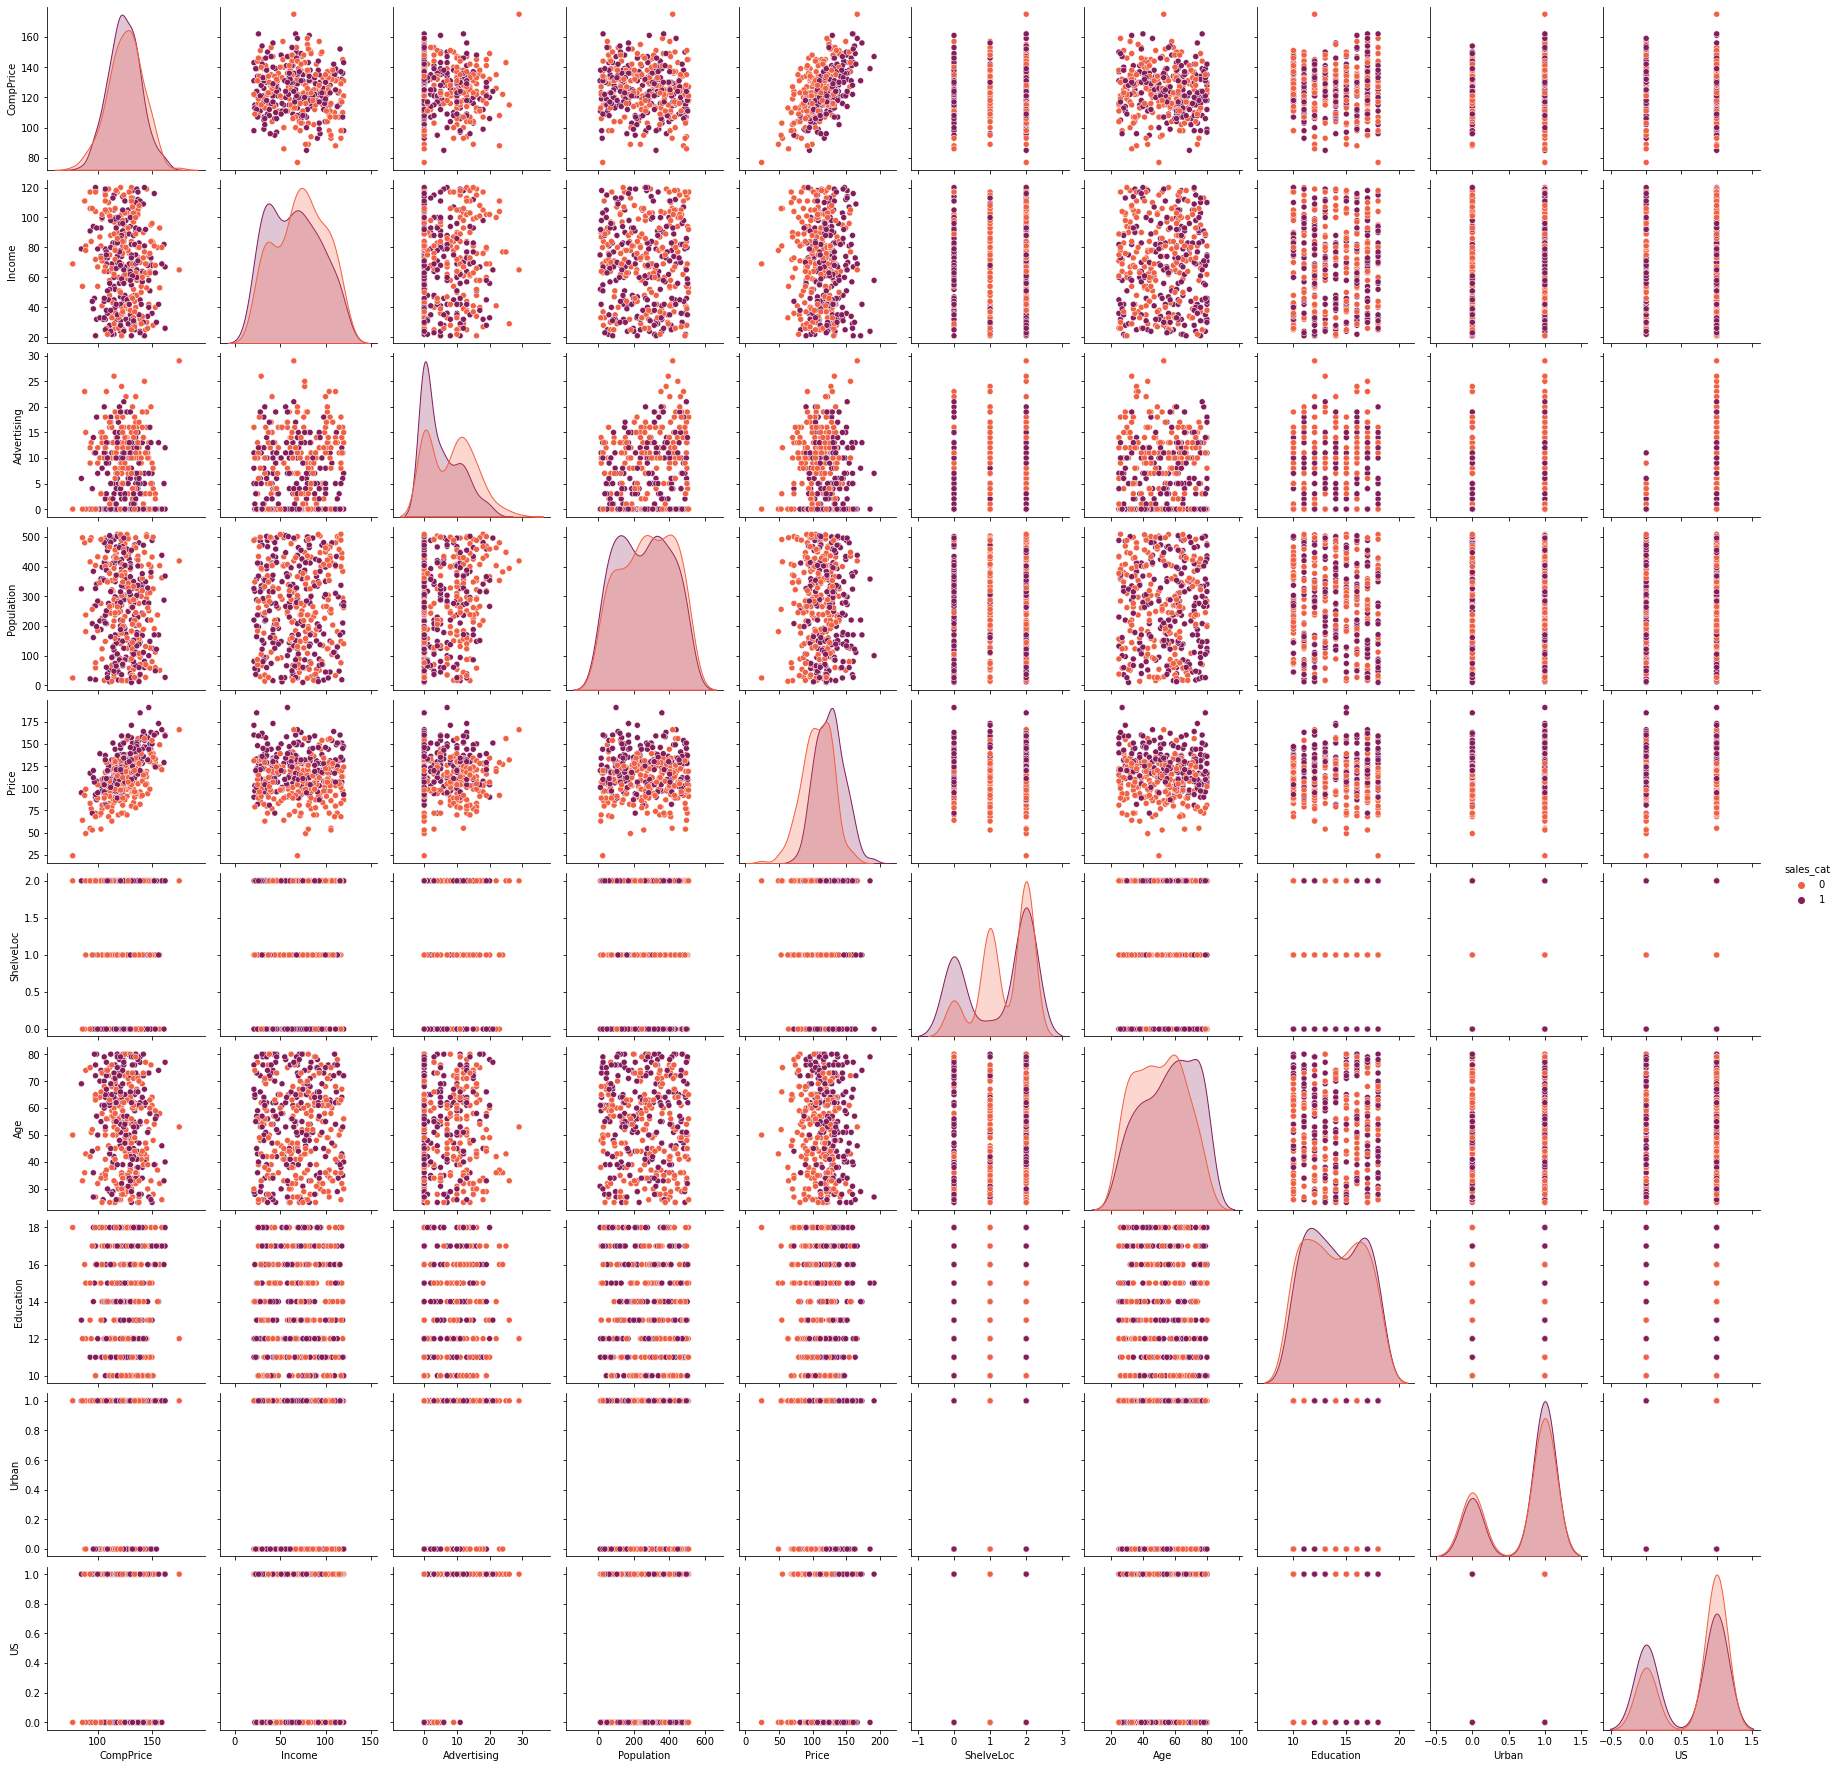

In [29]:
sns.pairplot(df,hue='sales_cat',palette='rocket_r')

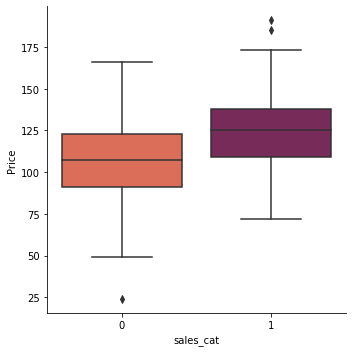

In [30]:
sns.catplot(x='sales_cat',y='Price',data=df,kind='box',palette='rocket_r')

In [31]:
# feature engineering
 # train test split

In [32]:
X = df.iloc[:,:-1]
y =df.sales_cat
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [33]:
# random forest classifier
model =  RandomForestClassifier(n_estimators=10,max_features='auto',random_state=101)
model.fit(X_train,y_train)
pred = model.predict(X_test)

In [34]:
confusion_matrix(y_test,pred)

array([[46, 14],
       [12, 48]], dtype=int64)

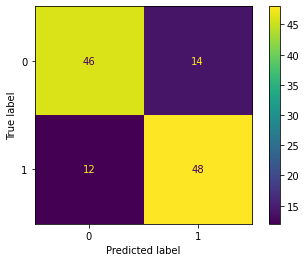

In [35]:
plot_confusion_matrix(model,X_test,y_test)

In [36]:
print(classification_report(y_test,pred))
#better values than CART

              precision    recall  f1-score   support

           0       0.79      0.77      0.78        60
           1       0.77      0.80      0.79        60

    accuracy                           0.78       120
   macro avg       0.78      0.78      0.78       120
weighted avg       0.78      0.78      0.78       120



In [37]:
model.feature_importances_

array([0.1049395 , 0.12700226, 0.09603462, 0.10197808, 0.24570997,
       0.092216  , 0.14744317, 0.03846461, 0.027119  , 0.01909278])

In [38]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance']) 

Feature Importance
CompPrice              0.104940
Income                 0.127002
Advertising            0.096035
Population             0.101978
Price                  0.245710
ShelveLoc              0.092216
Age                    0.147443
Education              0.038465
Urban                  0.027119
US                     0.019093

In [39]:
# report model function
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))

In [40]:
# final model
fnl_model = RandomForestClassifier(n_estimators=100,max_features=6,random_state=120)
fnl_model.fit(X_train,y_train)
report_model(fnl_model)

              precision    recall  f1-score   support

           0       0.81      0.78      0.80        60
           1       0.79      0.82      0.80        60

    accuracy                           0.80       120
   macro avg       0.80      0.80      0.80       120
weighted avg       0.80      0.80      0.80       120



In [41]:
fnl_model.feature_importances_

array([0.14089185, 0.10264365, 0.10962907, 0.08329205, 0.26834252,
       0.08674554, 0.1389529 , 0.0458862 , 0.01399144, 0.00962477])

In [42]:
pd.DataFrame(index=X.columns,data=fnl_model.feature_importances_,columns=['Feature Importance']) 

Feature Importance
CompPrice              0.140892
Income                 0.102644
Advertising            0.109629
Population             0.083292
Price                  0.268343
ShelveLoc              0.086746
Age                    0.138953
Education              0.045886
Urban                  0.013991
US                     0.009625

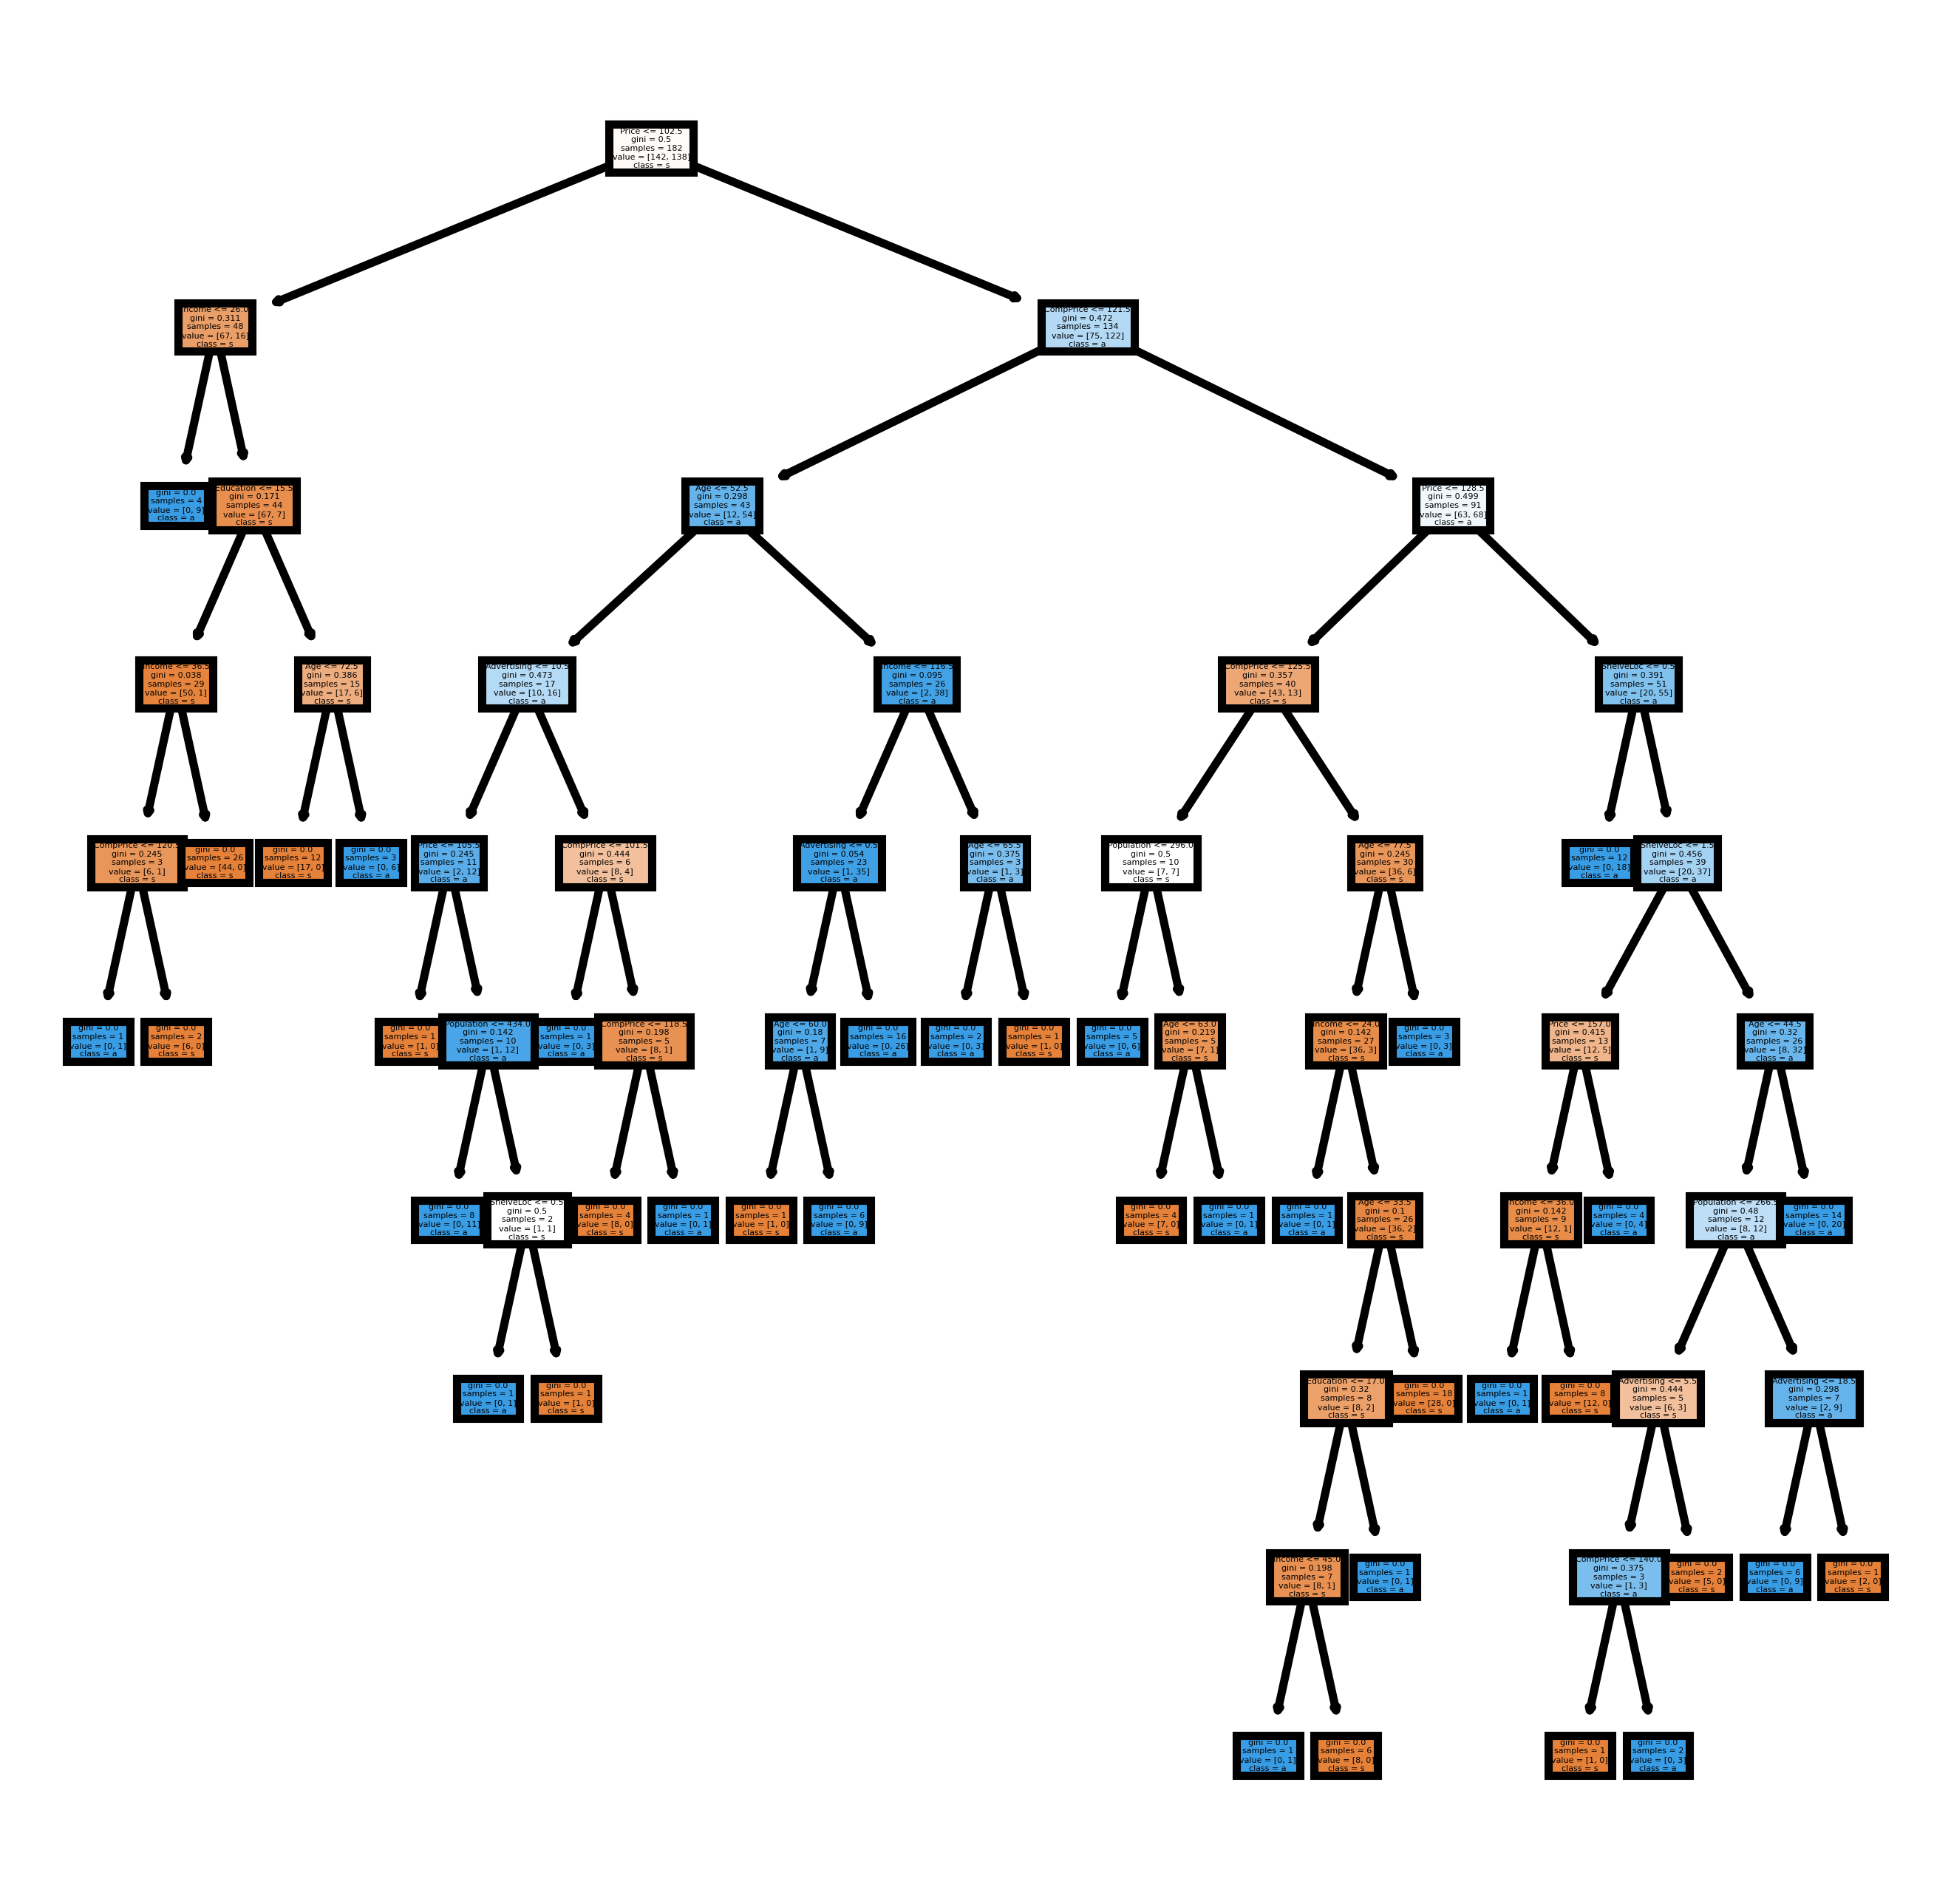

In [43]:
# single estimator
fn=df.columns.values[:-1]
cn=df.columns.values[-1]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(fnl_model.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);

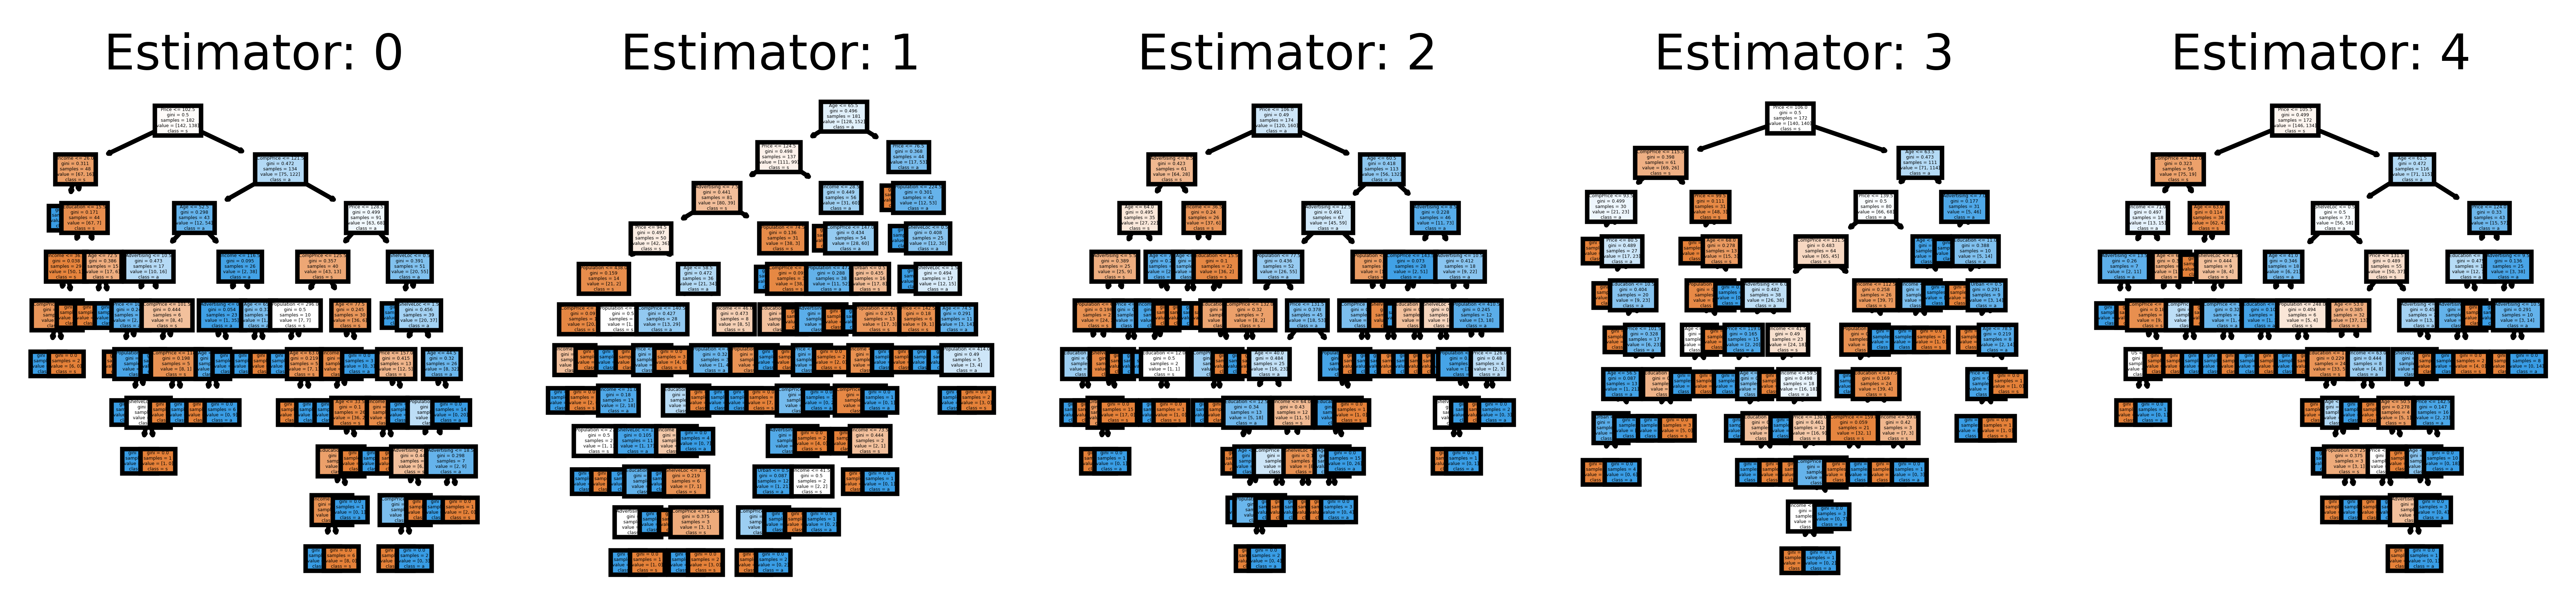

In [44]:
# multiple tree estimators
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900) 
for index in range(0, 5):
    tree.plot_tree(fnl_model.estimators_[index],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)